In [7]:
%reset -f
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

original_prices = pd.read_csv("HistoricalPrices.csv", sep=r'\s*,\s*', engine = 'python')[::-1].reset_index(drop=True)
prices = original_prices.copy(deep = True)
prices['Date'] = prices['Date'].apply(lambda x: int(''.join(x[0:5].split('/'))))

del prices['Date']
del prices['Open']
del prices['High']
del prices['Low']

# Current close minus previous close
difference = prices['Close'].diff(1).fillna(0)   

# Current different divided by previous close
prices['Ratio'] = difference.div(prices['Close'].shift(1)).fillna(0)

# Standardize the columns
prices_standardized=(prices-prices.min())/(prices.max()-prices.min())

prices_standardized

,Close,Ratio
0,0.273911,0.400824
1,0.294789,0.565418
2,0.295325,0.405004
3,0.290685,0.364613
4,0.267666,0.220769
...,...,...
3938,0.254104,0.474991
3939,0.264989,0.487444
3940,0.264811,0.399412
3941,0.273019,0.465814


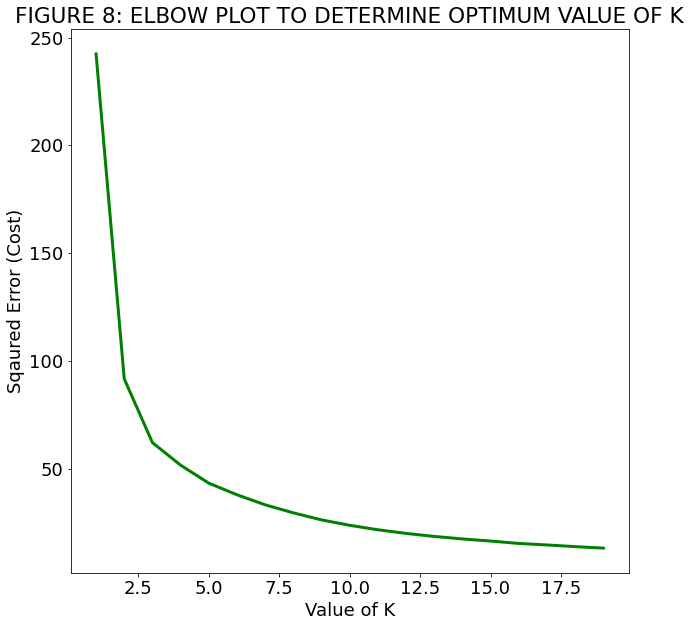

In [8]:
# Finding the value of K
cost =[] 
for i in range(1, 20): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(prices_standardized) # USE STANDARDIZED DATA HERE
      
    # calculates squared error for the clustered points 
    cost.append(KM.inertia_)
    
    
# plot the cost against K values   
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})
plt.plot(range(1, 20), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.title("FIGURE 8: ELBOW PLOT TO DETERMINE OPTIMUM VALUE OF K")
plt.show()

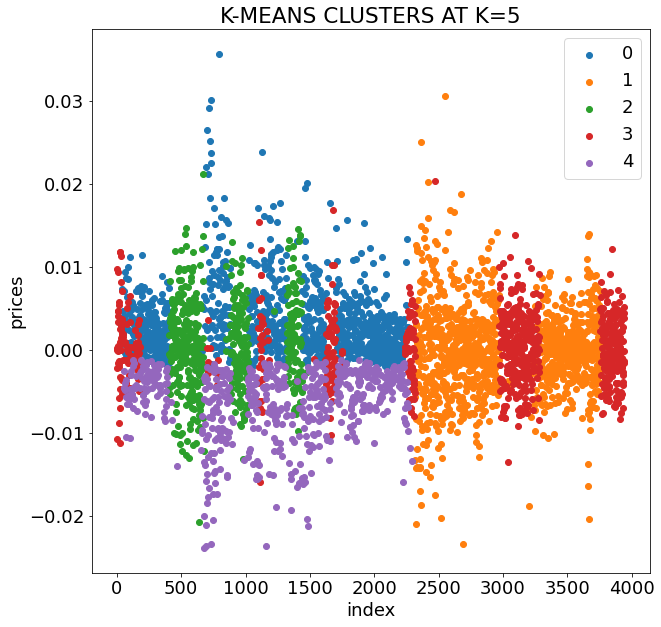

In [9]:
#####################################################################################
# BEGIN K-MEANS
#####################################################################################
num_clusters = 5
kmeans = KMeans(n_clusters= num_clusters)
label = kmeans.fit_predict(prices_standardized) 
u_labels = np.unique(label)

idx = np.array(list(prices.index))
close_price = np.array(list(prices['Ratio']))


fig = plt.figure()
for i in u_labels:
    plt.scatter(idx[label == i] , close_price[label == i] , label = i) 
plt.legend()
plt.xlabel("index")
plt.ylabel("prices")
plt.title("K-MEANS CLUSTERS AT K={}".format(num_clusters))
plt.show()
